In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.path as mpath
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
#from xgcm import Grid
import requests
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import glob, os

import dask.array as da
from dask.diagnostics import ProgressBar

In [2]:
col_height = xr.open_dataset(f'Data_Step2/control/col_height.nc').rename({'yh':'lat', 'xh':'lon'})['col_height']

# Ensure that longitude coords are from -180 to 180
col_height.coords['lon'] = (col_height.coords['lon'] + 180) % 360 - 180
col_height = col_height.sortby(col_height.lon)

In [3]:
umo = xr.open_mfdataset('Data_Step2/historical/umo.nc')['umo'].rename({'yh':'lat', 'xq':'lon', 'z_l':'depth'})

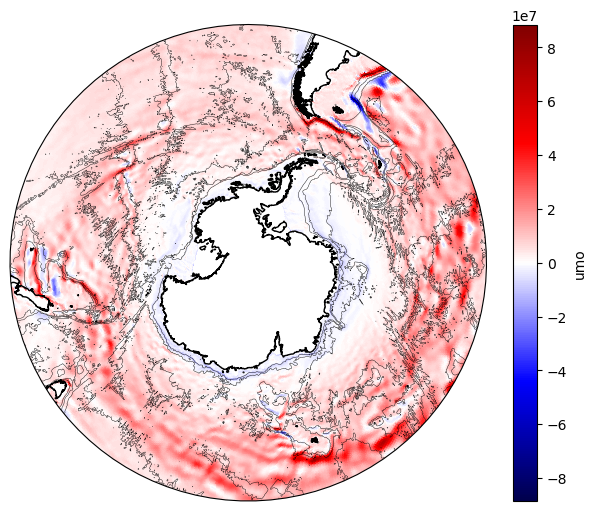

In [4]:
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=-90)},
                         figsize=(6,5), constrained_layout=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

umo.isel(depth=0).sel(lat=slice(-90,-40)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic')

xr.plot.contour(col_height.sel(lat=slice(-90,-40)), ax=axes,
                transform=ccrs.PlateCarree(), colors='black', linewidths=0.3)

axes.coastlines(resolution='10m')
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

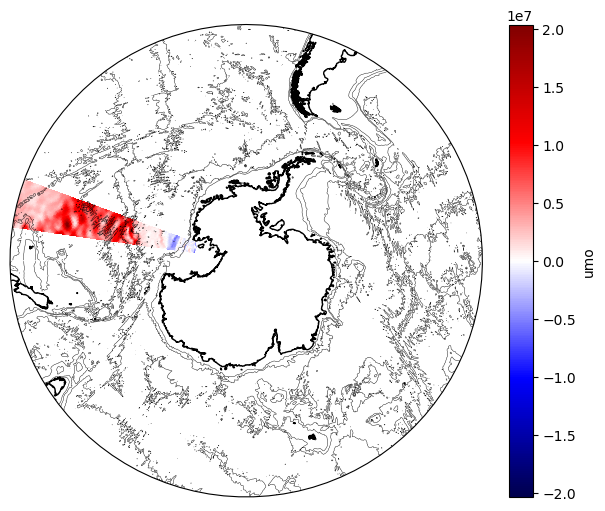

In [5]:
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=-90)},
                         figsize=(6,5), constrained_layout=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

umo.isel(depth=0).sel(lat=slice(-90,-40)).sel(lon=slice(-172,-160)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic')

xr.plot.contour(col_height.sel(lat=slice(-90,-40)), ax=axes,
                transform=ccrs.PlateCarree(), colors='black', linewidths=0.3)

axes.coastlines(resolution='10m')
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

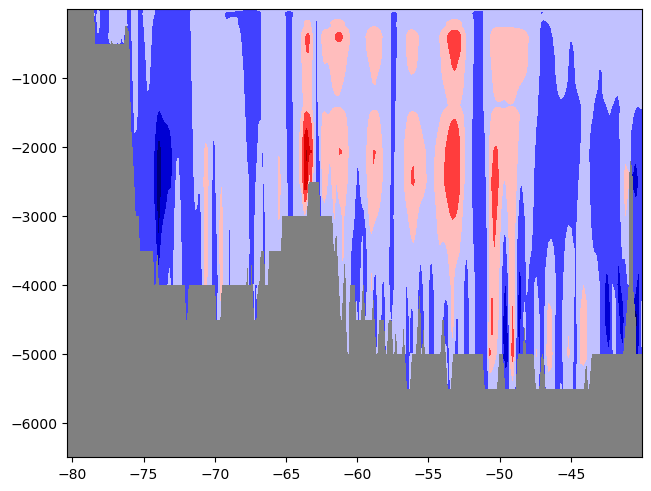

In [6]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

X = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').lat
Y = -umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').depth
Z = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest')
axes.contourf(X, Y, Z, cmap='seismic')

axes.set_facecolor('Gray')

plt.show()

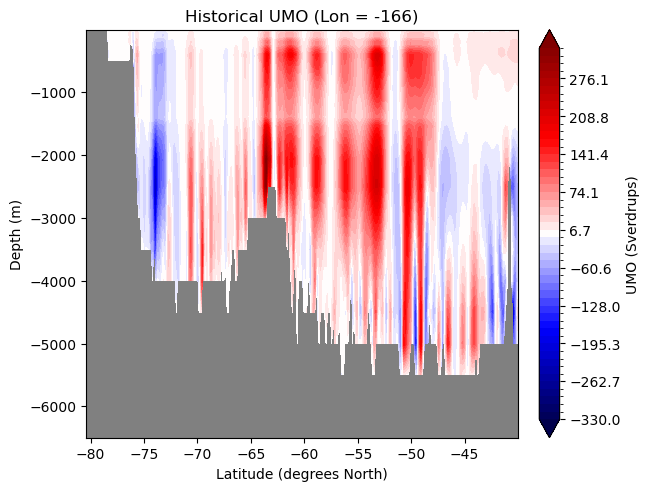

In [7]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest') / 1e6
# Invert depth coordinate
to_plot['depth'] = -to_plot['depth']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 vmin=-330, vmax=330, cbar_kwargs={'label':'UMO (Sverdrups)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('Historical UMO (Lon = -166)')

plt.show()

Text(0.5, 1.0, 'Lat Averaged UMO vs Depth (Lon=-166)')

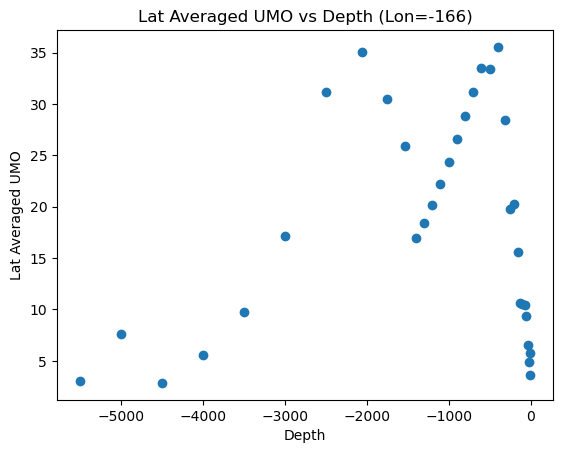

In [8]:
plt.scatter(to_plot.depth, to_plot.mean('lat', skipna=True).compute())
plt.xlabel('Depth')
plt.ylabel('Lat Averaged UMO')
plt.title('Lat Averaged UMO vs Depth (Lon=-166)')

In [9]:
umo = xr.open_mfdataset('Data_Step2/ssp585_2080_2099/umo.nc')['umo'].rename({'yh':'lat', 'xq':'lon', 'z_l':'depth'})

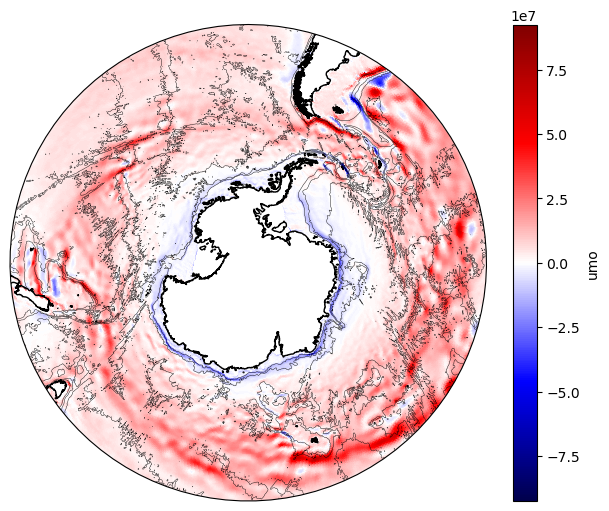

In [10]:
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=-90)},
                         figsize=(6,5), constrained_layout=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

umo.isel(depth=0).sel(lat=slice(-90,-40)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic')

xr.plot.contour(col_height.sel(lat=slice(-90,-40)), ax=axes,
                transform=ccrs.PlateCarree(), colors='black', linewidths=0.3)

axes.coastlines(resolution='10m')
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

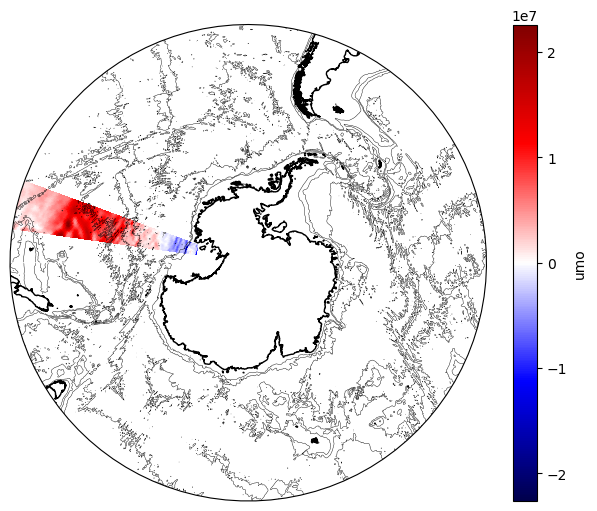

In [11]:
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=-90)},
                         figsize=(6,5), constrained_layout=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

umo.isel(depth=0).sel(lat=slice(-90,-40)).sel(lon=slice(-172,-160)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic')

xr.plot.contour(col_height.sel(lat=slice(-90,-40)), ax=axes,
                transform=ccrs.PlateCarree(), colors='black', linewidths=0.3)

axes.coastlines(resolution='10m')
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

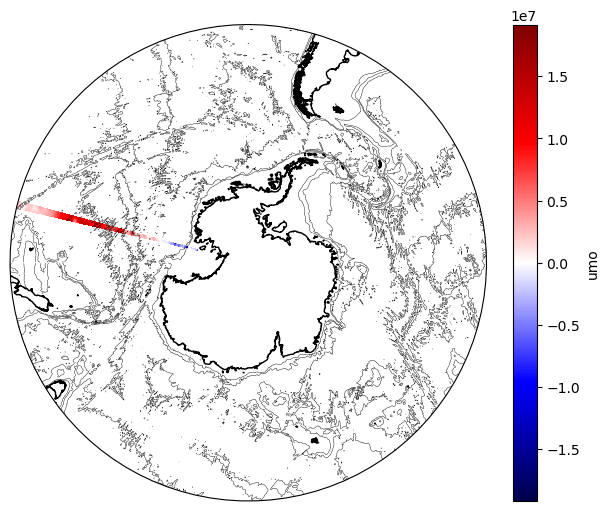

In [12]:
fig, axes = plt.subplots(1, 1, subplot_kw={'projection':ccrs.SouthPolarStereo(central_longitude=-90)},
                         figsize=(6,5), constrained_layout=True)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

umo.isel(depth=0).sel(lat=slice(-90,-40)).sel(lon=slice(-167,-165)).plot(ax=axes, transform=ccrs.PlateCarree(), cmap='seismic')

xr.plot.contour(col_height.sel(lat=slice(-90,-40)), ax=axes,
                transform=ccrs.PlateCarree(), colors='black', linewidths=0.3)

axes.coastlines(resolution='10m')
axes.set_boundary(circle, transform=axes.transAxes)

plt.show()

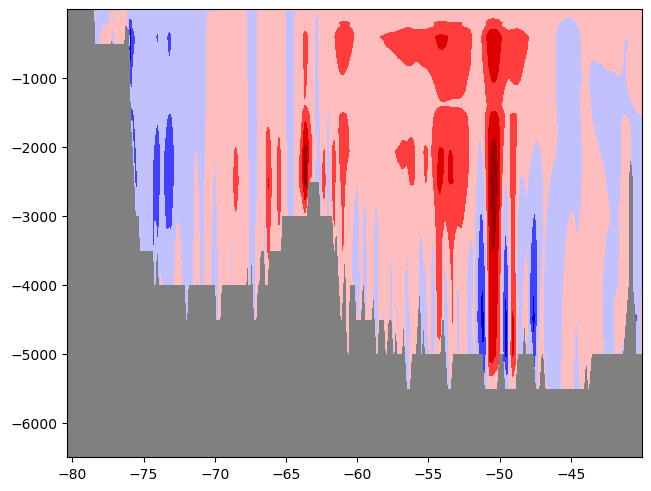

In [13]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

X = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').lat
Y = -umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').depth
Z = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest')
axes.contourf(X, Y, Z, cmap='seismic')

axes.set_facecolor('Gray')

plt.show()

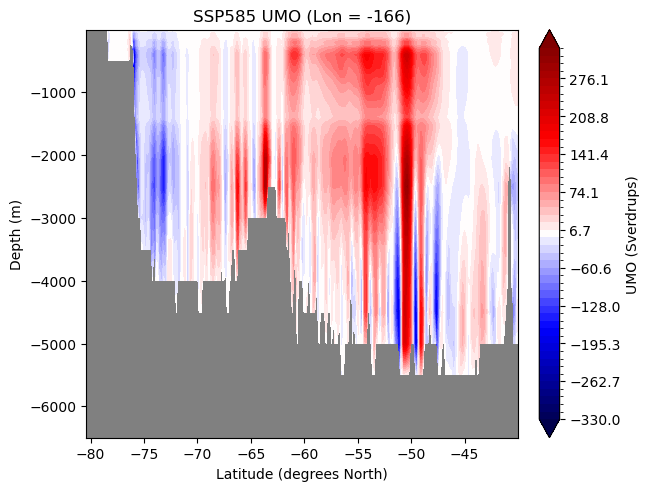

In [14]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest') / 1e6
# Invert depth coordinate
to_plot['depth'] = -to_plot['depth']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 vmin=-330, vmax=330, cbar_kwargs={'label':'UMO (Sverdrups)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('SSP585 UMO (Lon = -166)')

plt.show()

Text(0.5, 1.0, 'Lat Averaged UMO vs Depth (Lon=-166)')

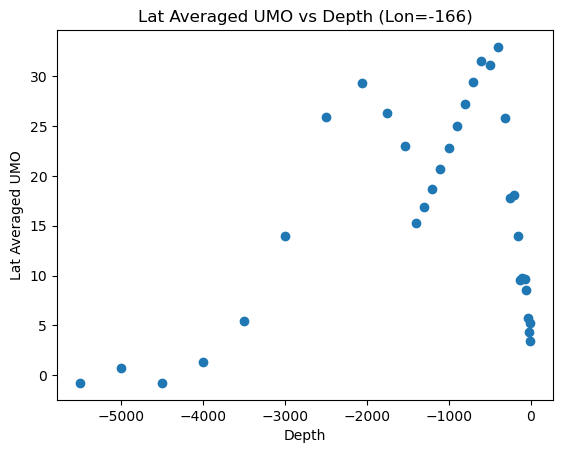

In [15]:
plt.scatter(to_plot.depth, to_plot.mean('lat', skipna=True).compute())
plt.xlabel('Depth')
plt.ylabel('Lat Averaged UMO')
plt.title('Lat Averaged UMO vs Depth (Lon=-166)')

In [16]:
to_plot.mean('lat', skipna=True).compute()

<xarray.DataArray 'umo' (depth: 35)>
array([ 3.4690077 ,  5.201712  ,  4.311848  ,  5.7849674 ,  8.512566  ,
        9.657555  ,  9.734699  ,  9.586349  , 13.982825  , 18.123821  ,
       17.773834  , 25.804672  , 32.956997  , 31.186611  , 31.532927  ,
       29.385134  , 27.192055  , 24.999638  , 22.836275  , 20.71923   ,
       18.681286  , 16.896397  , 15.295552  , 23.009285  , 26.35894   ,
       29.303259  , 25.89358   , 13.97216   ,  5.439113  ,  1.284134  ,
       -0.77654314,  0.6927245 , -0.7746689 ,         nan,         nan],
      dtype=float32)
Coordinates:
    lon      float64 -166.0
  * depth    (depth) float64 -2.5 -10.0 -20.0 -32.5 ... -5.5e+03 -6e+03 -6.5e+03

Text(0.5, 1.0, 'SSP585 2080-2100 Mean UMO vs Depth')

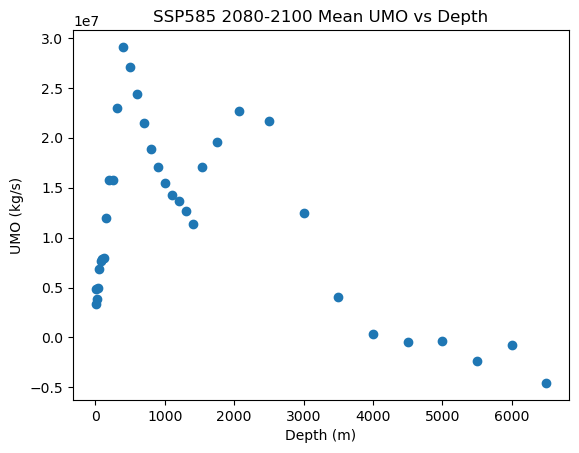

In [17]:
test = umo.sel(lat=slice(-90,-40)).compute()
to_plot = test.mean('lon', skipna=True)

plt.scatter(to_plot.depth, to_plot.mean('lat', skipna=True).compute())
plt.xlabel('Depth (m)')
plt.ylabel('UMO (kg/s)')
plt.title('SSP585 2080-2100 Mean UMO vs Depth')

In [18]:
umo.depth

<xarray.DataArray 'depth' (depth: 35)>
array([2.5000e+00, 1.0000e+01, 2.0000e+01, 3.2500e+01, 5.1250e+01, 7.5000e+01,
       1.0000e+02, 1.2500e+02, 1.5625e+02, 2.0000e+02, 2.5000e+02, 3.1250e+02,
       4.0000e+02, 5.0000e+02, 6.0000e+02, 7.0000e+02, 8.0000e+02, 9.0000e+02,
       1.0000e+03, 1.1000e+03, 1.2000e+03, 1.3000e+03, 1.4000e+03, 1.5375e+03,
       1.7500e+03, 2.0625e+03, 2.5000e+03, 3.0000e+03, 3.5000e+03, 4.0000e+03,
       4.5000e+03, 5.0000e+03, 5.5000e+03, 6.0000e+03, 6.5000e+03])
Coordinates:
  * depth    (depth) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Depth at cell center
    units:      meters
    axis:       Z
    positive:   down
    edges:      z_i

In [19]:
uo = xr.open_mfdataset('Data_Step2/ssp585_2080_2099/uo.nc')['uo'].rename({'yh':'lat', 'xq':'lon', 'z_l':'depth'})

Text(0.5, 1.0, 'SSP585 2080-2100 Mean UO vs Depth')

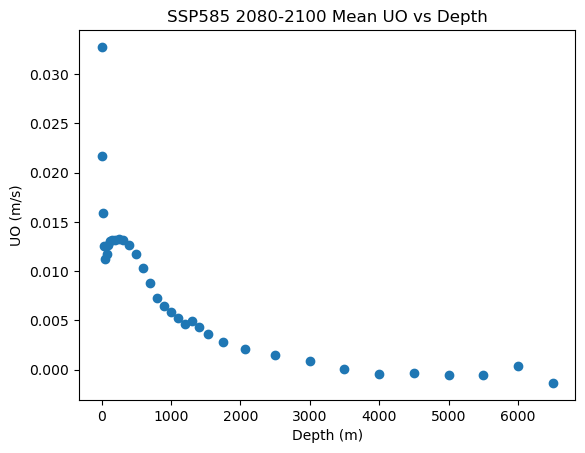

In [20]:
test = uo.sel(lat=slice(-90,-40)).compute()
to_plot = test.mean('lon', skipna=True)

plt.scatter(to_plot.depth, to_plot.mean('lat', skipna=True).compute())
plt.xlabel('Depth (m)')
plt.ylabel('UO (m/s)')
plt.title('SSP585 2080-2100 Mean UO vs Depth')

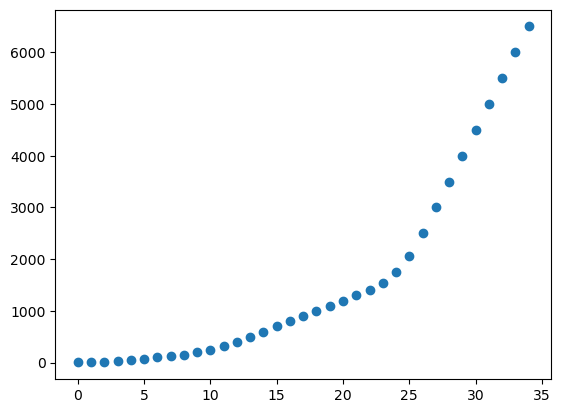

In [21]:
plt.scatter(range(len(umo.depth.data)), umo.depth.data)

# New

In [59]:
ds_grid=xr.open_dataset(
    '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_piControl_c192_OM4p25_v8/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ocean_monthly_z.static.nc')

In [118]:
z_i = xr.open_mfdataset(
    '/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ts/monthly/5yr/ocean_monthly_z.209501-209912.uo.nc').z_i
dz_i = np.diff(z_i.data)

In [119]:
uo = xr.open_mfdataset('Data_Step2/ssp585_2080_2099/uo.nc')['uo']

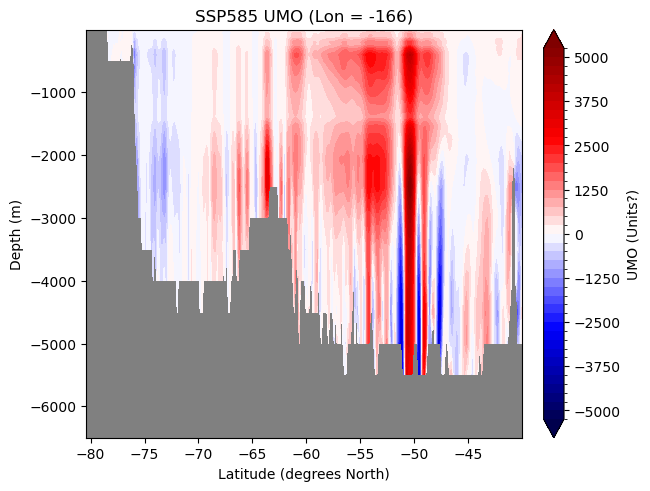

In [123]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = uo * ds_grid['dxCu'] * ds_grid['dyCu'] * dz_i.reshape(len(uo.z_l.data),1,1)
to_plot = to_plot.sel(yh=slice(-90,-40)).sel(xq=-166, method='nearest').compute() / 1e6

# Invert depth coordinate
to_plot['z_l'] = -to_plot['z_l']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 cbar_kwargs={'label':'UMO (Units?)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('SSP585 UMO (Lon = -166)')

plt.show()

In [124]:
uo = xr.open_mfdataset('Data_Step2/historical/uo.nc')['uo']

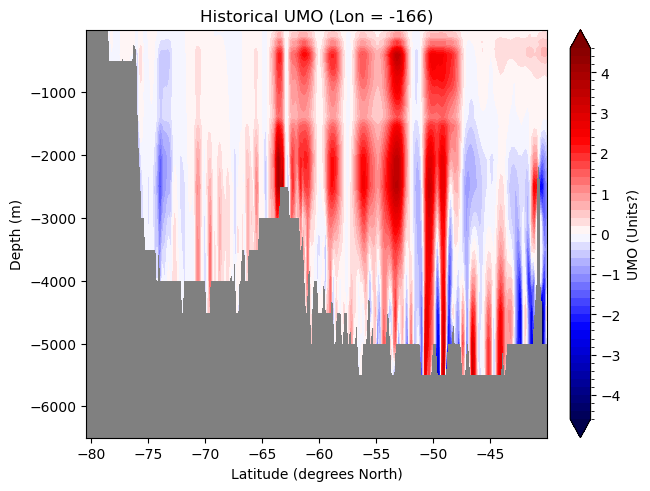

In [129]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = uo * ds_grid['dxCu'] * ds_grid['dyCu'] * dz_i.reshape(len(uo.z_l.data),1,1)
#to_plot = uo *  ds_grid['dyCu'] * dz_i.reshape(len(uo.z_l.data),1,1)
to_plot = to_plot.sel(yh=slice(-90,-40)).sel(xq=-166, method='nearest').compute() / 1e6 / 997

# Invert depth coordinate
to_plot['z_l'] = -to_plot['z_l']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 cbar_kwargs={'label':'UMO (Units?)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('Historical UMO (Lon = -166)')

plt.show()

In [126]:
dz_l

array([  7.5 ,  10.  ,  12.5 ,  18.75,  23.75,  25.  ,  25.  ,  31.25,
        43.75,  50.  ,  62.5 ,  87.5 , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 137.5 , 212.5 ,
       312.5 , 437.5 , 500.  , 500.  , 500.  , 500.  , 500.  , 500.  ,
       500.  , 500.  , 500.  ])

In [127]:
dz_i

array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])

In [60]:
ds_grid

<xarray.Dataset>
Dimensions:       (yq: 1081, xq: 1441, yh: 1080, xh: 1440)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.43 -80.35 -80.27 -80.19 ... 89.78 89.89 90.0
Data variables: (12/26)
    Coriolis      (yq, xq) float32 ...
    areacello     (yh, xh) float32 ...
    areacello_bu  (yq, xq) float32 ...
    areacello_cu  (yh, xq) float32 ...
    areacello_cv  (yq, xh) float32 ...
    deptho        (yh, xh) float32 ...
    ...            ...
    hfgeou        (yh, xh) float32 ...
    sftof         (yh, xh) float32 ...
    wet           (yh, xh) float32 ...
    wet_c         (yq, xq) float32 ...
    wet_u         (yh, xq) float32 ...
    wet_v         (yq, xh) float32 ...
Attributes:
    external_variables:  areacello areacello

In [56]:
ds_grid.dxCu

<xarray.DataArray 'dxCu' (yh: 1080, xq: 1441)>
[1556280 values with dtype=float32]
Coordinates:
  * xq       (xq) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    long_name:      Delta(x) at u points (meter)
    units:          m
    cell_methods:   time: point
    interp_method:  none

In [54]:
test_uo = xr.open_mfdataset('/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_ssp585_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/ocean_monthly_z/ts/monthly/5yr/ocean_monthly_z.209501-209912.uo.nc')

In [49]:
dz_l = np.append(np.diff(test.z_l.data), 500)
dz_l

array([  7.5 ,  10.  ,  12.5 ,  18.75,  23.75,  25.  ,  25.  ,  31.25,
        43.75,  50.  ,  62.5 ,  87.5 , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 137.5 , 212.5 ,
       312.5 , 437.5 , 500.  , 500.  , 500.  , 500.  , 500.  , 500.  ,
       500.  , 500.  , 500.  ])

In [88]:
dz_l[7:10]

array([31.25, 43.75, 50.  ])

In [50]:
dz_i = np.diff(test.z_i.data)
dz_i

array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])

In [89]:
dz_i[7:10]

array([25. , 37.5, 50. ])

In [52]:
(umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').compute() / dz_l.reshape(-1,1)) * dz_i.reshape(-1,1)

<xarray.DataArray 'umo' (depth: 35, lat: 329)>
array([[             nan,              nan,              nan, ...,
        1090753.41666667, 1538870.83333333, 1933612.33333333],
       [             nan,              nan,              nan, ...,
        2262316.5       , 3470876.        , 4628705.        ],
       [             nan,              nan,              nan, ...,
        1551007.4       , 2407594.8       , 3284401.4       ],
       ...,
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan],
       [             nan,              nan,              nan, ...,
                     nan,              nan,              nan]])
Coordinates:
    lon      float64 -166.0
  * lat      (lat) float64 -80.39 -80.31 -80.23 -80.15 ... -40.41 -40.22 -40.03
  * depth    (depth) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03

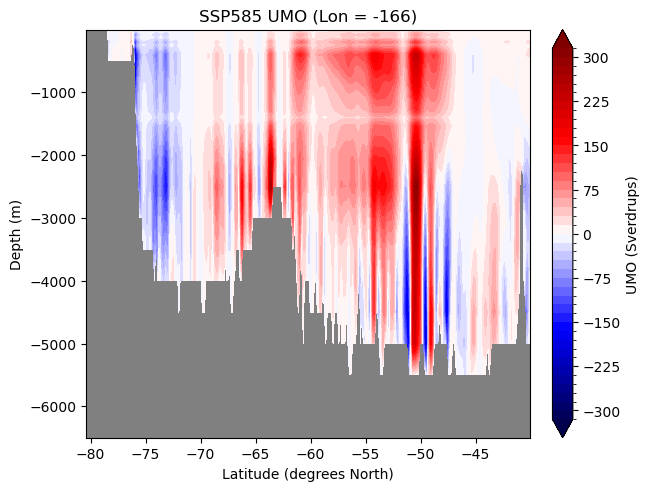

In [53]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = (umo.sel(lat=slice(-90,-40)).sel(lon=-166, method='nearest').compute() / dz_l.reshape(-1,1)) * dz_i.reshape(-1,1) / 1e6
# Invert depth coordinate
to_plot['depth'] = -to_plot['depth']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 cbar_kwargs={'label':'UMO (Sverdrups)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('SSP585 UMO (Lon = -166)')

plt.show()

In [78]:
uo.rename({'lat':'yh', 'lon':'xq', 'depth':'z_l'}) * ds_grid['dxCu'] * ds_grid['dyCu'] * dz_i.reshape(35,1,1)

<xarray.DataArray (z_l: 35, yh: 1080, xq: 1441)>
dask.array<mul, shape=(35, 1080, 1441), dtype=float64, chunksize=(35, 1080, 1441), chunktype=numpy.ndarray>
Coordinates:
  * xq       (xq) float64 -299.8 -299.6 -299.3 -299.1 ... 59.66 59.91 60.16
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03

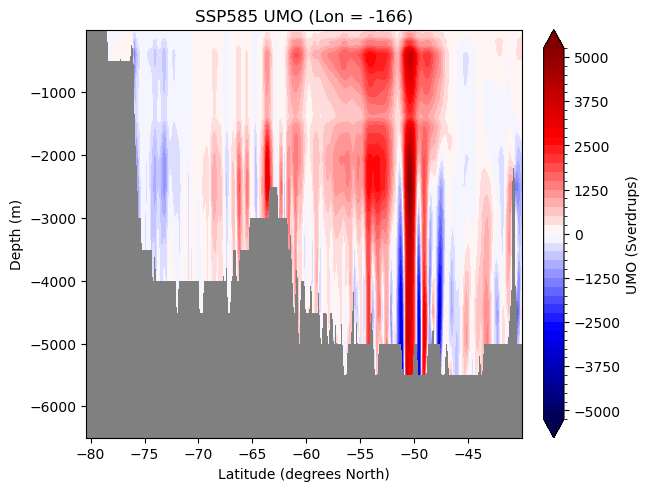

In [106]:
fig, axes = plt.subplots(1, 1, constrained_layout=True)

# Convert to Sverdrups
to_plot = uo.rename({'lat':'yh', 'lon':'xq', 'depth':'z_l'}) * ds_grid['dxCu'] * ds_grid['dyCu'] * dz_i.reshape(35,1,1)
to_plot = to_plot.sel(yh=slice(-90,-40)).sel(xq=-166, method='nearest').compute() / 1e6

# Invert depth coordinate
to_plot['z_l'] = -to_plot['z_l']

xr.plot.contourf(to_plot, ax=axes, cmap=plt.cm.seismic, extend='both', levels=50,
                 cbar_kwargs={'label':'UMO (Sverdrups)'})

axes.set_facecolor('Grey')
axes.set_xlabel('Latitude (degrees North)')
axes.set_ylabel('Depth (m)')
axes.set_title('SSP585 UMO (Lon = -166)')

plt.show()

In [107]:
to_plot.mean('yh')

<xarray.DataArray (z_l: 35)>
array([ 64.92428935,  99.03920296,  81.46605986, 106.68693928,
       150.17247103, 168.77024961, 171.31977646, 170.30862929,
       249.5092938 , 322.67836182, 313.29282763, 451.92998302,
       569.95603264, 537.96367261, 542.13471025, 504.3399556 ,
       465.976252  , 427.64407218, 390.20244987, 354.1059727 ,
       319.86579477, 287.93839701, 260.18000201, 391.17112609,
       442.39476539, 486.81888714, 439.78773918, 262.10399132,
       124.40171317,  29.04870489,  -3.10699466, -20.0237335 ,
       191.6177689 ,          nan,          nan])
Coordinates:
    xq       float64 -166.0
  * z_l      (z_l) float64 -2.5 -10.0 -20.0 -32.5 ... -5.5e+03 -6e+03 -6.5e+03

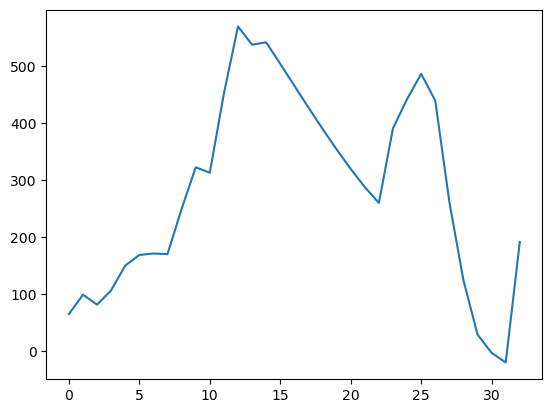

In [108]:
plt.plot(to_plot.mean('yh'))